# **Objective**
**To segment customers into groups for a targeted marketing strategy.**
**To use PCA to improve upon the clustering and visualization done in assignment 2.**

## Data
- Source: [Credit Card Dataset for Clustering (Kaggle)](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)
- Original source: Unknown

## Problem Statement
The marketing department for a credit card company wants to learn more about the different kinds of customers they have, in order to develop a marketing strategy that targets each group separately. As a data scientist, the task is to:
1. Identify the best way to cluster customers into groups.
2. Provide a clear description of each group to guide marketing strategies.


## Sample Dataset Information
The dataset summarizes the usage behavior of approximately 9000 active credit card holders over the last 6 months. It includes 18 behavioral variables at the customer level.

### Data Dictionary

| **Variable**                     | **Description**                                                                                         | **Type**        |
|---------------------------------|---------------------------------------------------------------------------------------------------------|-----------------|
| **CUST_ID**                      | Identification of the Credit Card holder                                                                | Categorical     |
| **BALANCE**                      | Balance amount left in their account to make purchases                                                  | Numerical       |
| **BALANCE_FREQUENCY**           | How frequently the Balance is updated (score between 0 and 1)                                           | Numerical (0–1) |
| **PURCHASES**                    | Total amount of purchases made from the account                                                         | Numerical       |
| **ONEOFF_PURCHASES**            | Maximum purchase amount done in one go                                                                  | Numerical       |
| **INSTALLMENTS_PURCHASES**       | Amount of purchase done in installments                                                                 | Numerical       |
| **CASH_ADVANCE**                 | Cash in advance taken by the user                                                                      | Numerical       |
| **PURCHASES_FREQUENCY**          | How frequently the Purchases are made (score between 0 and 1)                                          | Numerical (0–1) |
| **ONEOFFPURCHASESFREQUENCY**     | How frequently purchases are happening in one go (score between 0 and 1)                               | Numerical (0–1) |
| **PURCHASESINSTALLMENTSFREQUENCY** | How frequently purchases in installments are made (score between 0 and 1)                              | Numerical (0–1) |
| **CASHADVANCEFREQUENCY**         | How frequently the cash in advance is taken (score between 0 and 1)                                    | Numerical (0–1) |
| **CASHADVANCETRX**               | Number of transactions made with "Cash in Advance"                                                      | Numerical       |
| **PURCHASES_TRX**                | Number of purchase transactions made                                                                    | Numerical       |
| **CREDIT_LIMIT**                 | Credit card limit for the user                                                                          | Numerical       |
| **PAYMENTS**                     | Total amount of payment done by the user                                                                | Numerical       |
| **MINIMUM_PAYMENTS**             | Minimum amount of payments made by the user                                                             | Numerical       |
| **PRCFULLPAYMENT**               | Percent of full payment paid by the user                                                                | Numerical       |
| **TENURE**                       | Tenure of the credit card service for the user (in months)                                              | Numerical       |

# Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data
data = pd.read_csv("CC GENERAL.csv")

In [3]:
# First 5 rows
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Summary Statistics
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



## Data Summary and Key Insights
---

### 1. Overall Impressions

| Observation | Details                                                                                               |
|-------------|-------------------------------------------------------------------------------------------------------|
| Record Count | Most columns have **8,950** entries. <br> **CREDIT_LIMIT** has 8,949 entries. <br> **MINIMUM_PAYMENTS** has 8,637 entries. |
| Missing Values | Missing entries in **CREDIT_LIMIT** (1 missing) and **MINIMUM_PAYMENTS** (313 missing).            |
| Right-Skewed Distribution | Monetary variables (e.g., `BALANCE`, `PURCHASES`, `PAYMENTS`) have **mean > median**, indicating a few high-value outliers. |
| Frequency-Based Variables | Most scores (e.g., `PURCHASES_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`) range **0–1**, but `CASH_ADVANCE_FREQUENCY` has a max of **1.5**, suggesting **outliers or data entry errors**. |

---

### 2. Detailed Insights by Key Features

| Feature                               | Mean (approx) | Median (approx) | Max (approx)  | Observations                                                                                                                                                  |
|---------------------------------------|---------------|-----------------|---------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **BALANCE**                           | 1564          | 873             | 19,043        | Large gap between mean and median; indicates a minority with very large balances (right-skew).                                                                |
| **BALANCE_FREQUENCY** (0–1 scale)     | 0.88          | 1.00            | 1.00          | Most customers have balances updated frequently. A small group has less frequent updates.                                                                     |
| **PURCHASES**                         | 1003          | 361             | 49,039        | Wide range; some customers have very high purchase amounts compared to the majority.                                                                          |
| **ONEOFF_PURCHASES**                  | 592           | 38              | 40,761        | Large disparity between median and max; only a few make very large single transactions.                                                                        |
| **INSTALLMENTS_PURCHASES**            | 411           | 89              | 22,500        | Some use installment plans heavily; others do not use them at all.                                                                                            |
| **CASH_ADVANCE**                      | 979           | 0               | 47,137        | Over half do not use cash advances; a smaller subset uses them extensively.                                                                                   |
| **PURCHASES_FREQUENCY** (0–1 scale)   | 0.49          | 0.50            | 1.00          | Indicates moderate purchase frequency overall; some purchase very frequently, others rarely.                                                                  |
| **ONEOFF_PURCHASES_FREQUENCY** (0–1)  | 0.20          | 0.08            | 1.00          | Most customers rarely make one-off purchases.                                                                                                                 |
| **PURCHASES_INSTALLMENTS_FREQUENCY** (0–1) | 0.36    | 0.17            | 1.00          | Some rely on installment purchases; many do not.                                                                                                             |
| **CASH_ADVANCE_FREQUENCY** (0–1 scale) | 0.14          | 0.00            | 1.50          | Max of 1.5 is a **data anomaly** (above stated 0–1 range).                                                                                                    |
| **CASH_ADVANCE_TRX**                  | 3.25          | 0               | 123           | Many have no cash-advance transactions; a small group uses them multiple times.                                                                               |
| **PURCHASES_TRX**                     | 14.71         | 7               | 358           | Some customers have few purchase transactions, others have very many.                                                                                        |
| **CREDIT_LIMIT**                      | 4494          | 3000            | 30,000        | Credit limits vary from as low as \$50 to \$30K.                                                                                                              |
| **PAYMENTS**                          | 1733          | 857             | 50,721        | Small group makes extremely large payments; most make moderate amounts.                                                                                      |
| **MINIMUM_PAYMENTS**                  | 864           | 312             | 76,406        | Very high max suggests outliers or large cumulative minimum dues; many have small minimum payments.                                                          |
| **PRC_FULL_PAYMENT** (0–1 scale)      | 0.15          | 0.00            | 1.00          | Most do not pay in full regularly; a small group pays in full consistently.                                                                                   |
| **TENURE**                            | 11.52         | 12              | Range: 6–12   | Most customers have had the card for 12 months; a smaller subset for less than that.                                                                          |

---

### 3. Key Takeaways

| Takeaway                                          | Explanation                                                                                                                                  |
|---------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------|
| **High Skewness in Monetary Values**              | A small group of high-value customers drives up the means for `BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `PAYMENTS`, `MINIMUM_PAYMENTS`.         |
| **Two Distinct User Segments (At Least)**         | - Large group with low one-off purchases, minimal or zero cash advances<br>- Smaller group with high balances, frequent cash advances        |
| **Credit Limit Variations**                       | Ranges from 50 dollars to 30,000 dollars, indicating different risk profiles and spending capacities.                                                    |
| **Payment Behaviors**                             | Many revolve balances (low `PRC_FULL_PAYMENT`), while a minority pays in full regularly.                                                     |
| **Frequency vs. Amount**                          | Some buy **infrequently** with **large amounts**; others buy **frequently** in **smaller amounts**.                                          |
| **Data Quality Concerns**                         | - `CASH_ADVANCE_FREQUENCY` max at 1.5 suggests a data-entry error<br>- Missing values in **CREDIT_LIMIT** & **MINIMUM_PAYMENTS** |


---

### 4. Conclusion

| Conclusion                                                                                                                                     |
|------------------------------------------------------------------------------------------------------------------------------------------------|
| The dataset shows at least a **multi-segment** pattern: a larger group with modest activity and a smaller group with very high credit usage. **Frequency metrics** reveal differing engagement styles (installments vs. one-off). To perform effective **clustering**, we must handle **missing data**, manage **outliers**, and **scale** the skewed variables. |


In [5]:
# Checking the Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
# Printing the missing values
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Handling missing values by Median Imputation
# Both MINIMUM_PAYMENTS and CREDIT_LIMIT are right skewed distributions it is less affected by outliers than the mean imputation. 

median_credit_limit = data['CREDIT_LIMIT'].median()
data['CREDIT_LIMIT'].fillna(median_credit_limit, inplace = True)


median_min_payments = data['MINIMUM_PAYMENTS'].median()
data['MINIMUM_PAYMENTS'].fillna(median_min_payments, inplace = True)


In [8]:
# Checking the missing values again
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Handling Missing Values with Median Imputation

After identifying that `CREDIT_LIMIT` had 1 missing value and `MINIMUM_PAYMENTS` had 313 missing values, we used **median imputation** for both columns. This strategy replaces each missing value with the median of its respective column.

**Why the median?**  
Both `CREDIT_LIMIT` and `MINIMUM_PAYMENTS` show right-skewed distributions, so using the median is generally more reliable than the mean. The median is less sensitive to extreme outliers, making it a better fit for skewed data.

In [9]:
# Finding any duplicated rows
data.duplicated().sum()

0

In [10]:
# Dropping CUST_ID because it we are pretending that there is no label
features = data.drop(columns = 'CUST_ID')

In [11]:
# Printing features columns without CUST_ID column
print(data.columns)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [12]:
# Clipping max at 1.0 (Data Anomaly CASH_ADVANCE_FREQUENCY)
data['CASH_ADVANCE_FREQUENCY'] = data['CASH_ADVANCE_FREQUENCY'].clip(upper = 1.0)

In [13]:
# To check if the new maximum is at 1 and not 1.5
print(data['CASH_ADVANCE_FREQUENCY'].max())

1.0


In [14]:
# Credit utilization
# Calculates the credit utilization ratio, which 
# shows how much of a credit limit is being used. It’s computed as the balance divided by the credit limit.
data['CREDIT_UTILIZATION'] = data['BALANCE'] / (data['CREDIT_LIMIT'] + 1e-6)


# Purchase type ratios
# These lines calculate the proportion of total purchases that are either installment purchases or one-off purchases.
#This helps analyze spending behavior
data['INSTALLMENT_RATIO'] = data['INSTALLMENTS_PURCHASES'] / (data['PURCHASES'] + 1e-6)
data['ONEOFF_RATIO'] = data['ONEOFF_PURCHASES'] / (data['PURCHASES'] + 1e-6)


# Payment behavior
# Creates a binary (0 or 1) indicator to flag whether a user tends to pay their credit card balance in full. 
# This is useful for identifying responsible payment behavior.
data['FULL_PAYMENT_INDICATOR'] = (data['PRC_FULL_PAYMENT'] > 0.8).astype(int)

In [15]:
# Finding skewness in numerical values

print("\n(Skewness of the variables):\n")
for col in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']:
    print(f"{col}: {data[col].skew()}")



(Skewness of the variables):

BALANCE: 2.393386042571806
PURCHASES: 8.144269064554651
CASH_ADVANCE: 5.1666090740747235
CREDIT_LIMIT: 1.5226359501884323
PAYMENTS: 5.907619794397562


### Skewness Analysis Summary

---------------------------------------------------------------
| **Feature**       | **Skewness Value** | **Interpretation** |
|-------------------|------------------|------------------|
| **BALANCE**      | **2.39**  | Moderately skewed |
| **PURCHASES**    | **8.14**  | Extremely skewed |
| **CASH_ADVANCE** | **5.17**  | Highly skewed |
| **CREDIT_LIMIT** | **1.52**  | Mildly skewed |
| **PAYMENTS**     | **5.91**  | Highly skewed |

### **Key Observations**
- **PURCHASES (8.14)** is **extremely skewed**, meaning a small number of customers have very high purchase amounts.
- **CASH_ADVANCE (5.17)** and **PAYMENTS (5.91)** also have **high skewness**, indicating that only a few customers make very large transactions.
- **BALANCE (2.39)** and **CREDIT_LIMIT (1.52)** are **moderately skewed** but still require transformation.

---


In [16]:
# Handling skewness
# Log1 for moderate and mildly skewed feature
import numpy as np
from scipy.stats import boxcox

# CREDIT_LIMIT and BALANCE contains zeros, np.log() would return -infinity, breaking the analysis. 
# np.log1p() avoids this by adding 1 before taking the logarithm
data['log_CREDIT_LIMIT'] = np.log1p(data['CREDIT_LIMIT'])
data['log_BALANCE'] = np.log1p(data['BALANCE'])


# Box-Cox for highly skewed data
# The boxcox function from scipy.stats applies the Box-Cox transformation, 
# it is a more flexible method than the logarithm. It’s designed to stabilize variance and make highly skewed data more normally distributed.
data['boxcox_CASH_ADVANCE'], _ = boxcox(data['CASH_ADVANCE'] + 1)
data['boxcox_PURCHASES'], _ = boxcox(data['PURCHASES'] + 1)
data['boxcox_PAYMENTS'], _ = boxcox(data['PAYMENTS'] + 1)

In [17]:
print("\n(Skewness of the variables):\n")
for col in ['boxcox_CASH_ADVANCE','boxcox_PURCHASES', 'boxcox_PAYMENTS', 'log_CREDIT_LIMIT', 'log_BALANCE']:
    print(f"{col}: {data[col].skew()}")


(Skewness of the variables):

boxcox_CASH_ADVANCE: 0.18841297206976743
boxcox_PURCHASES: -0.1786766921312919
boxcox_PAYMENTS: 0.12463045454831398
log_CREDIT_LIMIT: -0.10140769035040573
log_BALANCE: -0.8610205518180273


In [18]:
# Checking for outliers in the numerical values

# Storing all int and float values into numeric data
numeric_data = data.select_dtypes(include = ['int64', 'float64'])
                                  
# Defining the function find_outliers to all the numeric data
def find_outliers(data):
    '''
    This function will take the data that have dtype of int and float as an
    input and will calculate the number of outliers in each numeric columns.
    '''
    outliers = {}
    for column in numeric_data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[column] = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [19]:
# Printing the outliers from all the numeric values
outliers = find_outliers(numeric_data)


# Print the outliers in each numerical column 
for column, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {column}: ")
        # print(values)
        print((f"Number of Outliers: {len(values)}\n"))

Outliers in BALANCE: 
Number of Outliers: 695

Outliers in BALANCE_FREQUENCY: 
Number of Outliers: 1493

Outliers in PURCHASES: 
Number of Outliers: 808

Outliers in ONEOFF_PURCHASES: 
Number of Outliers: 1013

Outliers in INSTALLMENTS_PURCHASES: 
Number of Outliers: 867

Outliers in CASH_ADVANCE: 
Number of Outliers: 1030

Outliers in ONEOFF_PURCHASES_FREQUENCY: 
Number of Outliers: 782

Outliers in CASH_ADVANCE_FREQUENCY: 
Number of Outliers: 525

Outliers in CASH_ADVANCE_TRX: 
Number of Outliers: 804

Outliers in PURCHASES_TRX: 
Number of Outliers: 766

Outliers in CREDIT_LIMIT: 
Number of Outliers: 248

Outliers in PAYMENTS: 
Number of Outliers: 808

Outliers in MINIMUM_PAYMENTS: 
Number of Outliers: 909

Outliers in PRC_FULL_PAYMENT: 
Number of Outliers: 1474

Outliers in TENURE: 
Number of Outliers: 1366

Outliers in CREDIT_UTILIZATION: 
Number of Outliers: 3

Outliers in INSTALLMENT_RATIO: 
Number of Outliers: 3

Outliers in log_CREDIT_LIMIT: 
Number of Outliers: 6

Outliers in 

In [20]:
# Dropping CUST_ID because it we are pretending that there is no label
features2 = data.drop(columns = ['CUST_ID', 'PURCHASES', 'BALANCE', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT'])

# Printing features after the skewness transformation and using the transformed values
print(features2.columns)

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT', 'TENURE', 'CREDIT_UTILIZATION', 'INSTALLMENT_RATIO',
       'ONEOFF_RATIO', 'FULL_PAYMENT_INDICATOR', 'log_CREDIT_LIMIT',
       'log_BALANCE', 'boxcox_CASH_ADVANCE', 'boxcox_PURCHASES',
       'boxcox_PAYMENTS'],
      dtype='object')


In [21]:
# Displaying the correlation of the features
correlation_ = features2.corr()
correlation_

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,...,TENURE,CREDIT_UTILIZATION,INSTALLMENT_RATIO,ONEOFF_RATIO,FULL_PAYMENT_INDICATOR,log_CREDIT_LIMIT,log_BALANCE,boxcox_CASH_ADVANCE,boxcox_PURCHASES,boxcox_PAYMENTS
BALANCE_FREQUENCY,1.000000,0.104323,0.124292,0.229715,0.202415,0.176079,0.192323,0.141555,0.189626,0.131181,...,0.119776,0.404661,0.006815,0.035471,-0.059547,0.095060,0.652592,0.166100,0.137805,0.259363
ONEOFF_PURCHASES,0.104323,1.000000,0.330622,0.264937,0.524891,0.127729,-0.082739,-0.046212,0.545523,0.050256,...,0.064150,-0.042212,-0.004695,0.351094,0.120100,0.263466,0.165030,-0.109143,0.512163,0.395486
INSTALLMENTS_PURCHASES,0.124292,0.330622,1.000000,0.442418,0.214042,0.511351,-0.132499,-0.073999,0.628108,0.134019,...,0.086143,-0.058264,-0.005163,-0.095485,0.150513,0.214726,0.102436,-0.175624,0.525161,0.353037
PURCHASES_FREQUENCY,0.229715,0.264937,0.442418,1.000000,0.501343,0.862934,-0.309007,-0.203478,0.568430,0.006154,...,0.061506,-0.201782,-0.016072,0.086497,0.210345,0.112644,-0.093945,-0.438869,0.782490,0.178341
ONEOFF_PURCHASES_FREQUENCY,0.202415,0.524891,0.214042,0.501343,1.000000,0.142329,-0.111946,-0.069088,0.544869,-0.027311,...,0.082466,-0.092007,-0.008928,0.610280,0.146333,0.288059,0.146987,-0.184415,0.614050,0.318606
PURCHASES_INSTALLMENTS_FREQUENCY,0.176079,0.127729,0.511351,0.862934,0.142329,1.000000,-0.263306,-0.169207,0.529975,0.032055,...,0.073275,-0.161420,-0.008670,-0.235067,0.163008,0.052570,-0.107077,-0.361533,0.596200,0.133018
CASH_ADVANCE_FREQUENCY,0.192323,-0.082739,-0.132499,-0.309007,-0.111946,-0.263306,1.000000,0.801188,-0.131269,0.101009,...,-0.131118,0.360976,0.005063,-0.075365,-0.175647,0.139799,0.452898,0.759694,-0.318681,0.226235
CASH_ADVANCE_TRX,0.141555,-0.046212,-0.073999,-0.203478,-0.069088,-0.169207,0.801188,1.000000,-0.066157,0.111251,...,-0.043421,0.252617,0.001602,-0.047065,-0.125212,0.157543,0.352288,0.566016,-0.200736,0.254577
PURCHASES_TRX,0.189626,0.545523,0.628108,0.568430,0.544869,0.529975,-0.131269,-0.066157,1.000000,0.098722,...,0.121874,-0.043726,-0.007663,0.145527,0.143514,0.251272,0.146314,-0.190042,0.618329,0.371026
MINIMUM_PAYMENTS,0.131181,0.050256,0.134019,0.006154,-0.027311,0.032055,0.101009,0.111251,0.098722,1.000000,...,0.060006,0.312646,0.020088,-0.042117,-0.083264,0.113685,0.283507,0.116329,0.023968,0.128475


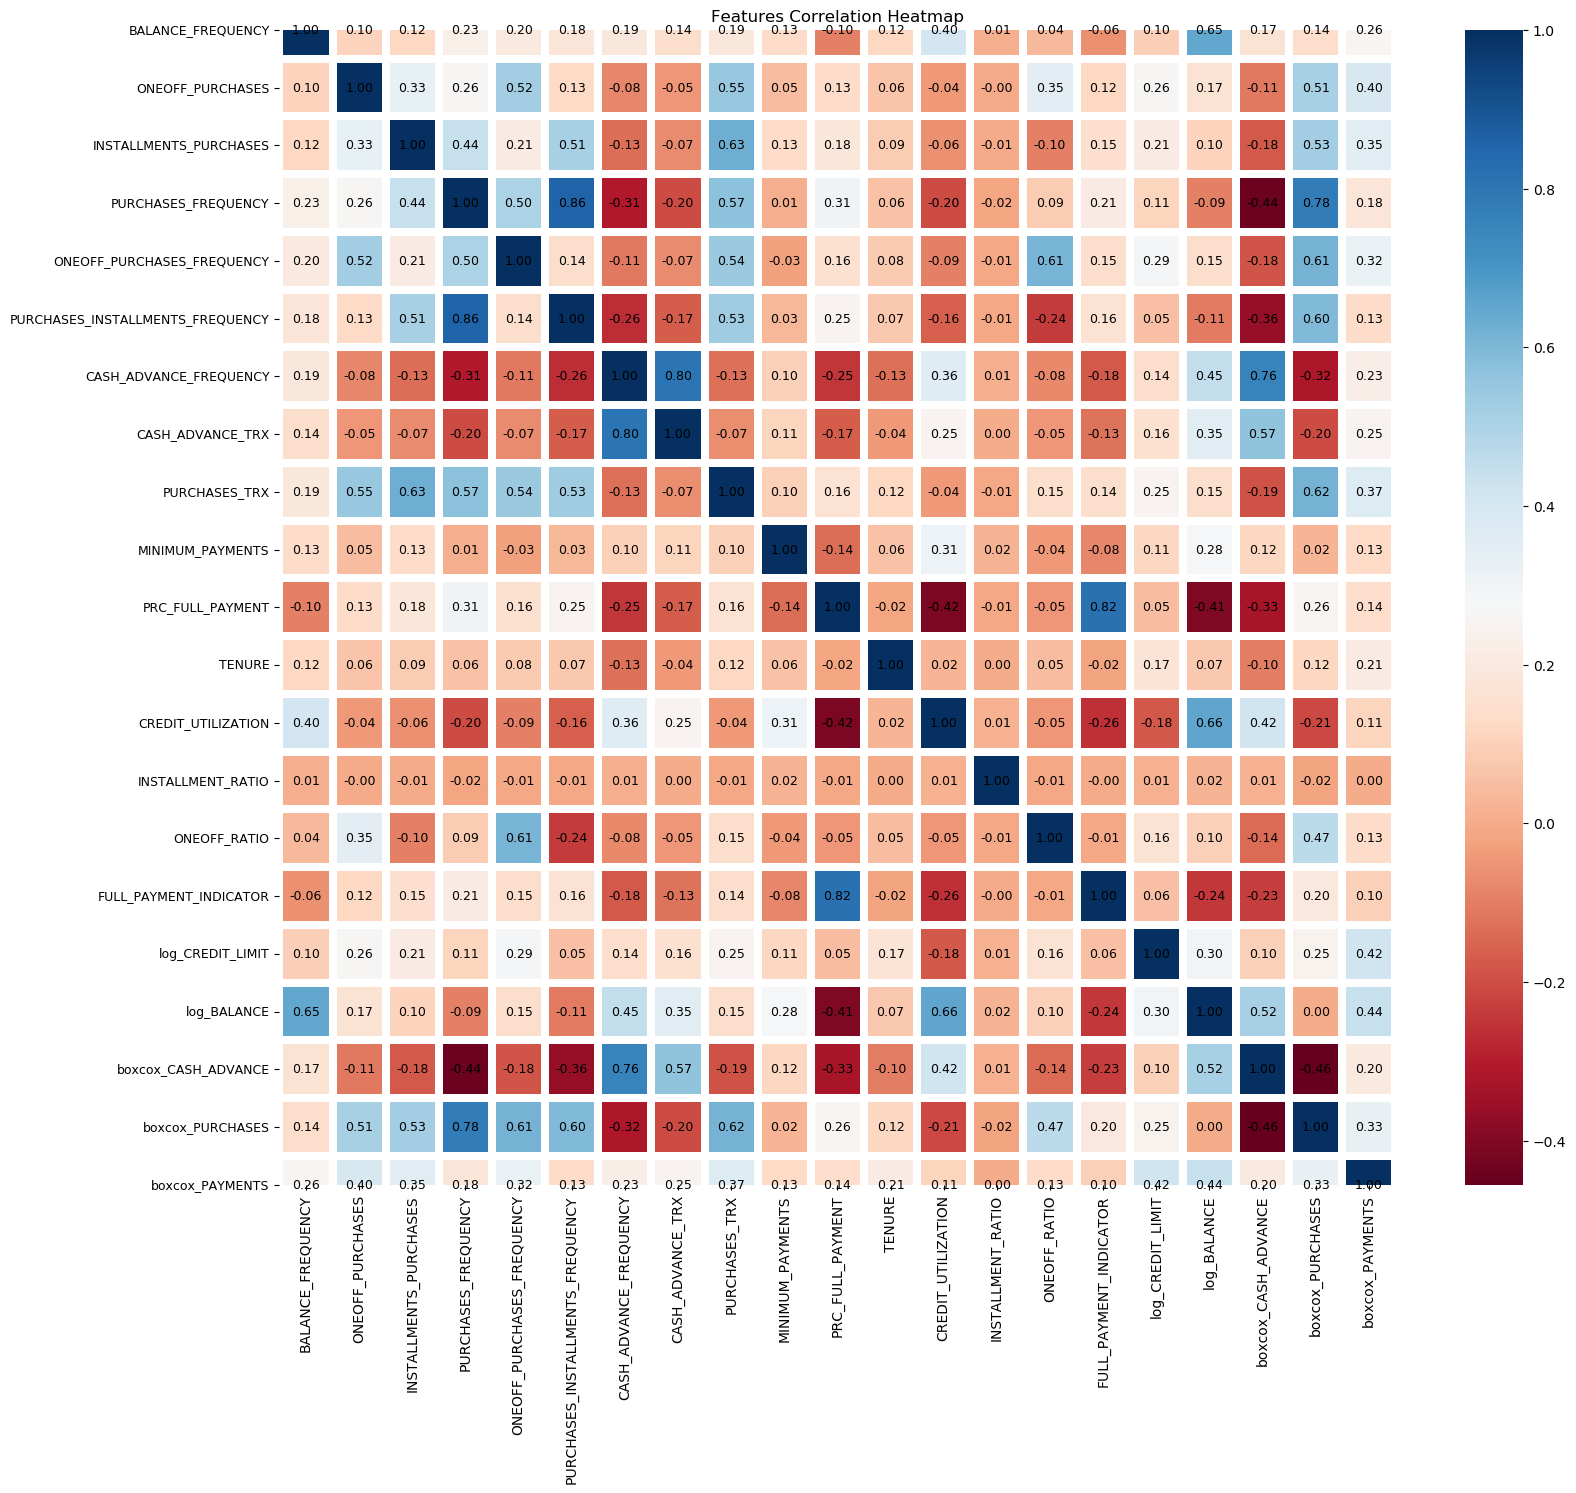

In [22]:
# Plotting the heatmap from the correlation matrix
plt.figure(figsize = (18,15))
sns.heatmap(correlation_, annot=True, cmap='RdBu', fmt='.2f', linewidths=5, annot_kws={"color": "black","size": 9} )
plt.title('Features Correlation Heatmap')
plt.yticks(fontsize=9)
plt.show()

# Key Observations and Insights from Updated Correlation Matrix

## Strong Positive Correlations

| Category | Observation |
|----------|------------|
| **PURCHASES_FREQUENCY vs. PURCHASES_INSTALLMENTS_FREQUENCY (0.86)** | Frequent purchasers still strongly favor installment purchases, consistent with pre-transformation behavior. |
| **CASH_ADVANCE_FREQUENCY vs. CASH_ADVANCE_TRX (0.80)** | High correlation persists; cash advance users continue to use them frequently and in larger transaction counts. |
| **boxcox_PURCHASES vs. PURCHASES_FREQUENCY (0.78)** | Transformed purchase amounts strongly correlate with purchase frequency, reinforcing that frequent buyers drive total spending. |
| **log_BALANCE vs. BALANCE_FREQUENCY (0.65)** | Higher transformed balances are strongly tied to how often balances are updated, suggesting active account usage. |
| **ONEOFF_PURCHASES_FREQUENCY vs. ONEOFF_RATIO (0.61)** | Frequent one-off purchases align closely with their proportion of total spending. |

## Moderate Positive Correlations

| Category | Observation |
|----------|------------|
| **boxcox_PURCHASES vs. PURCHASES_TRX (0.62)** | Transformed purchase amounts moderately correlate with transaction counts, indicating consistent spending patterns. |
| **log_BALANCE vs. CREDIT_UTILIZATION (0.66)** | Transformed balances strongly relate to credit utilization, showing that higher balances reflect greater credit usage. |
| **PURCHASES_TRX vs. INSTALLMENTS_PURCHASES (0.63)** | Transaction counts are moderately tied to installment purchases, suggesting a blend of purchase types. |
| **boxcox_PAYMENTS vs. log_CREDIT_LIMIT (0.42)** | Larger transformed payments moderately correlate with higher credit limits, indicating repayment capacity scales with credit availability. |

## Weak Positive Correlations

| Category | Observation |
|----------|------------|
| **TENURE vs. BALANCE_FREQUENCY (0.12)** | Tenure still shows a weak relationship with balance update frequency, consistent with prior findings. |
| **PURCHASES_FREQUENCY vs. FULL_PAYMENT_INDICATOR (0.21)** | Frequent purchasers are only weakly more likely to pay in full, a slight decrease from the original PRC_FULL_PAYMENT correlation (0.31). |

## Strong Negative Correlations

| Category | Observation |
|----------|------------|
| **boxcox_PURCHASES vs. boxcox_CASH_ADVANCE (-0.46)** | Transformed purchases and cash advances show a stronger negative correlation, highlighting a clearer divide between these behaviors. |
| **PURCHASES_FREQUENCY vs. CASH_ADVANCE_FREQUENCY (-0.31)** | Frequent purchasers are less likely to use cash advances frequently, slightly stronger than the original (-0.25). |
| **CREDIT_UTILIZATION vs. FULL_PAYMENT_INDICATOR (-0.26)** | Higher credit utilization is moderately negatively tied to full payment behavior, suggesting overextension reduces full payment likelihood. |

## Weak or No Correlation

| Category | Observation |
|----------|------------|
| **TENURE with Most Features** | Tenure continues to show weak correlations with most spending and payment behaviors. |
| **INSTALLMENT_RATIO with Most Features** | The ratio of installment purchases shows negligible correlations (e.g., 0.01 to 0.02), suggesting it’s not a strong behavioral driver. |

## Insights on Behavior

| Behavioral Segment | Insights |
|--------------------|---------|
| **Frequent Purchasers** | Customers with high PURCHASES_FREQUENCY and boxcox_PURCHASES strongly prefer installments (0.86 with PURCHASES_INSTALLMENTS_FREQUENCY), managing expenses over time. |
| **Cash Advance Users** | Cash advance users (high CASH_ADVANCE_FREQUENCY and boxcox_CASH_ADVANCE) remain distinct, with a stronger negative correlation to purchases (-0.46), indicating separate spending habits. |
| **High Credit Utilizers** | Customers with high log_BALANCE and CREDIT_UTILIZATION (0.66) actively use credit but are less likely to pay in full (-0.26 with FULL_PAYMENT_INDICATOR). |
| **Full Balance Payers** | Customers with high FULL_PAYMENT_INDICATOR carry lower transformed balances (-0.24 with log_BALANCE) and avoid cash advances (-0.23 with boxcox_CASH_ADVANCE). |
| **One-Off Spenders** | Customers with high ONEOFF_PURCHASES_FREQUENCY and ONEOFF_RATIO (0.61) focus spending on one-off purchases, moderately distinct from installment users. |

## Potential Actions for Customer Segmentation

| Segment | Recommended Action |
|---------|--------------------|
| **High Spenders** | Target customers with high boxcox_PURCHASES and PURCHASES_TRX for premium offers, as they drive revenue through frequent and diverse spending. |
| **Cash Advance Users** | Offer credit alternatives or financial education to customers with high boxcox_CASH_ADVANCE and CASH_ADVANCE_FREQUENCY to reduce reliance on costly advances. |
| **Full Balance Payers** | Incentivize customers with high FULL_PAYMENT_INDICATOR to increase spending (e.g., via rewards), as they maintain low balances and avoid cash advances| |
| **Installment Users** | Provide tailored installment plans for customers with high PURCHASES_INSTALLMENTS_FREQUENCY and boxcox_PURCHASES to encourage continued engagement. |
| **One-Off Spenders** | Promote big-ticket items or one-time purchase incentives for customers with high ONEOFF_RATIO and ONEOFF_PURCHASES_FREQUENCY. |

## Conclusion

The updated correlation matrix with log and Box-Cox transformations and combinition of ratios reveals refined insights into customer behavior such as:

- **Strengthened Behavioral Segments:** Transformations enhance the divide between purchase-driven behavior (**boxcox_PURCHASES**) and cash advance usage (**boxcox_CASH_ADVANCE**), with a notable negative correlation (-0.46).
- **Installment Preferences Remain Strong:** Frequent purchasers continue to favor installment plans (**0.86 correlation with PURCHASES_INSTALLMENTS_FREQUENCY**).
- **Full Payers vs. High Credit Utilizers:** Customers who pay in full tend to have lower balances and avoid cash advances, while high **credit utilizers (0.66 correlation with log_BALANCE)** actively use credit but are less likely to pay in full.

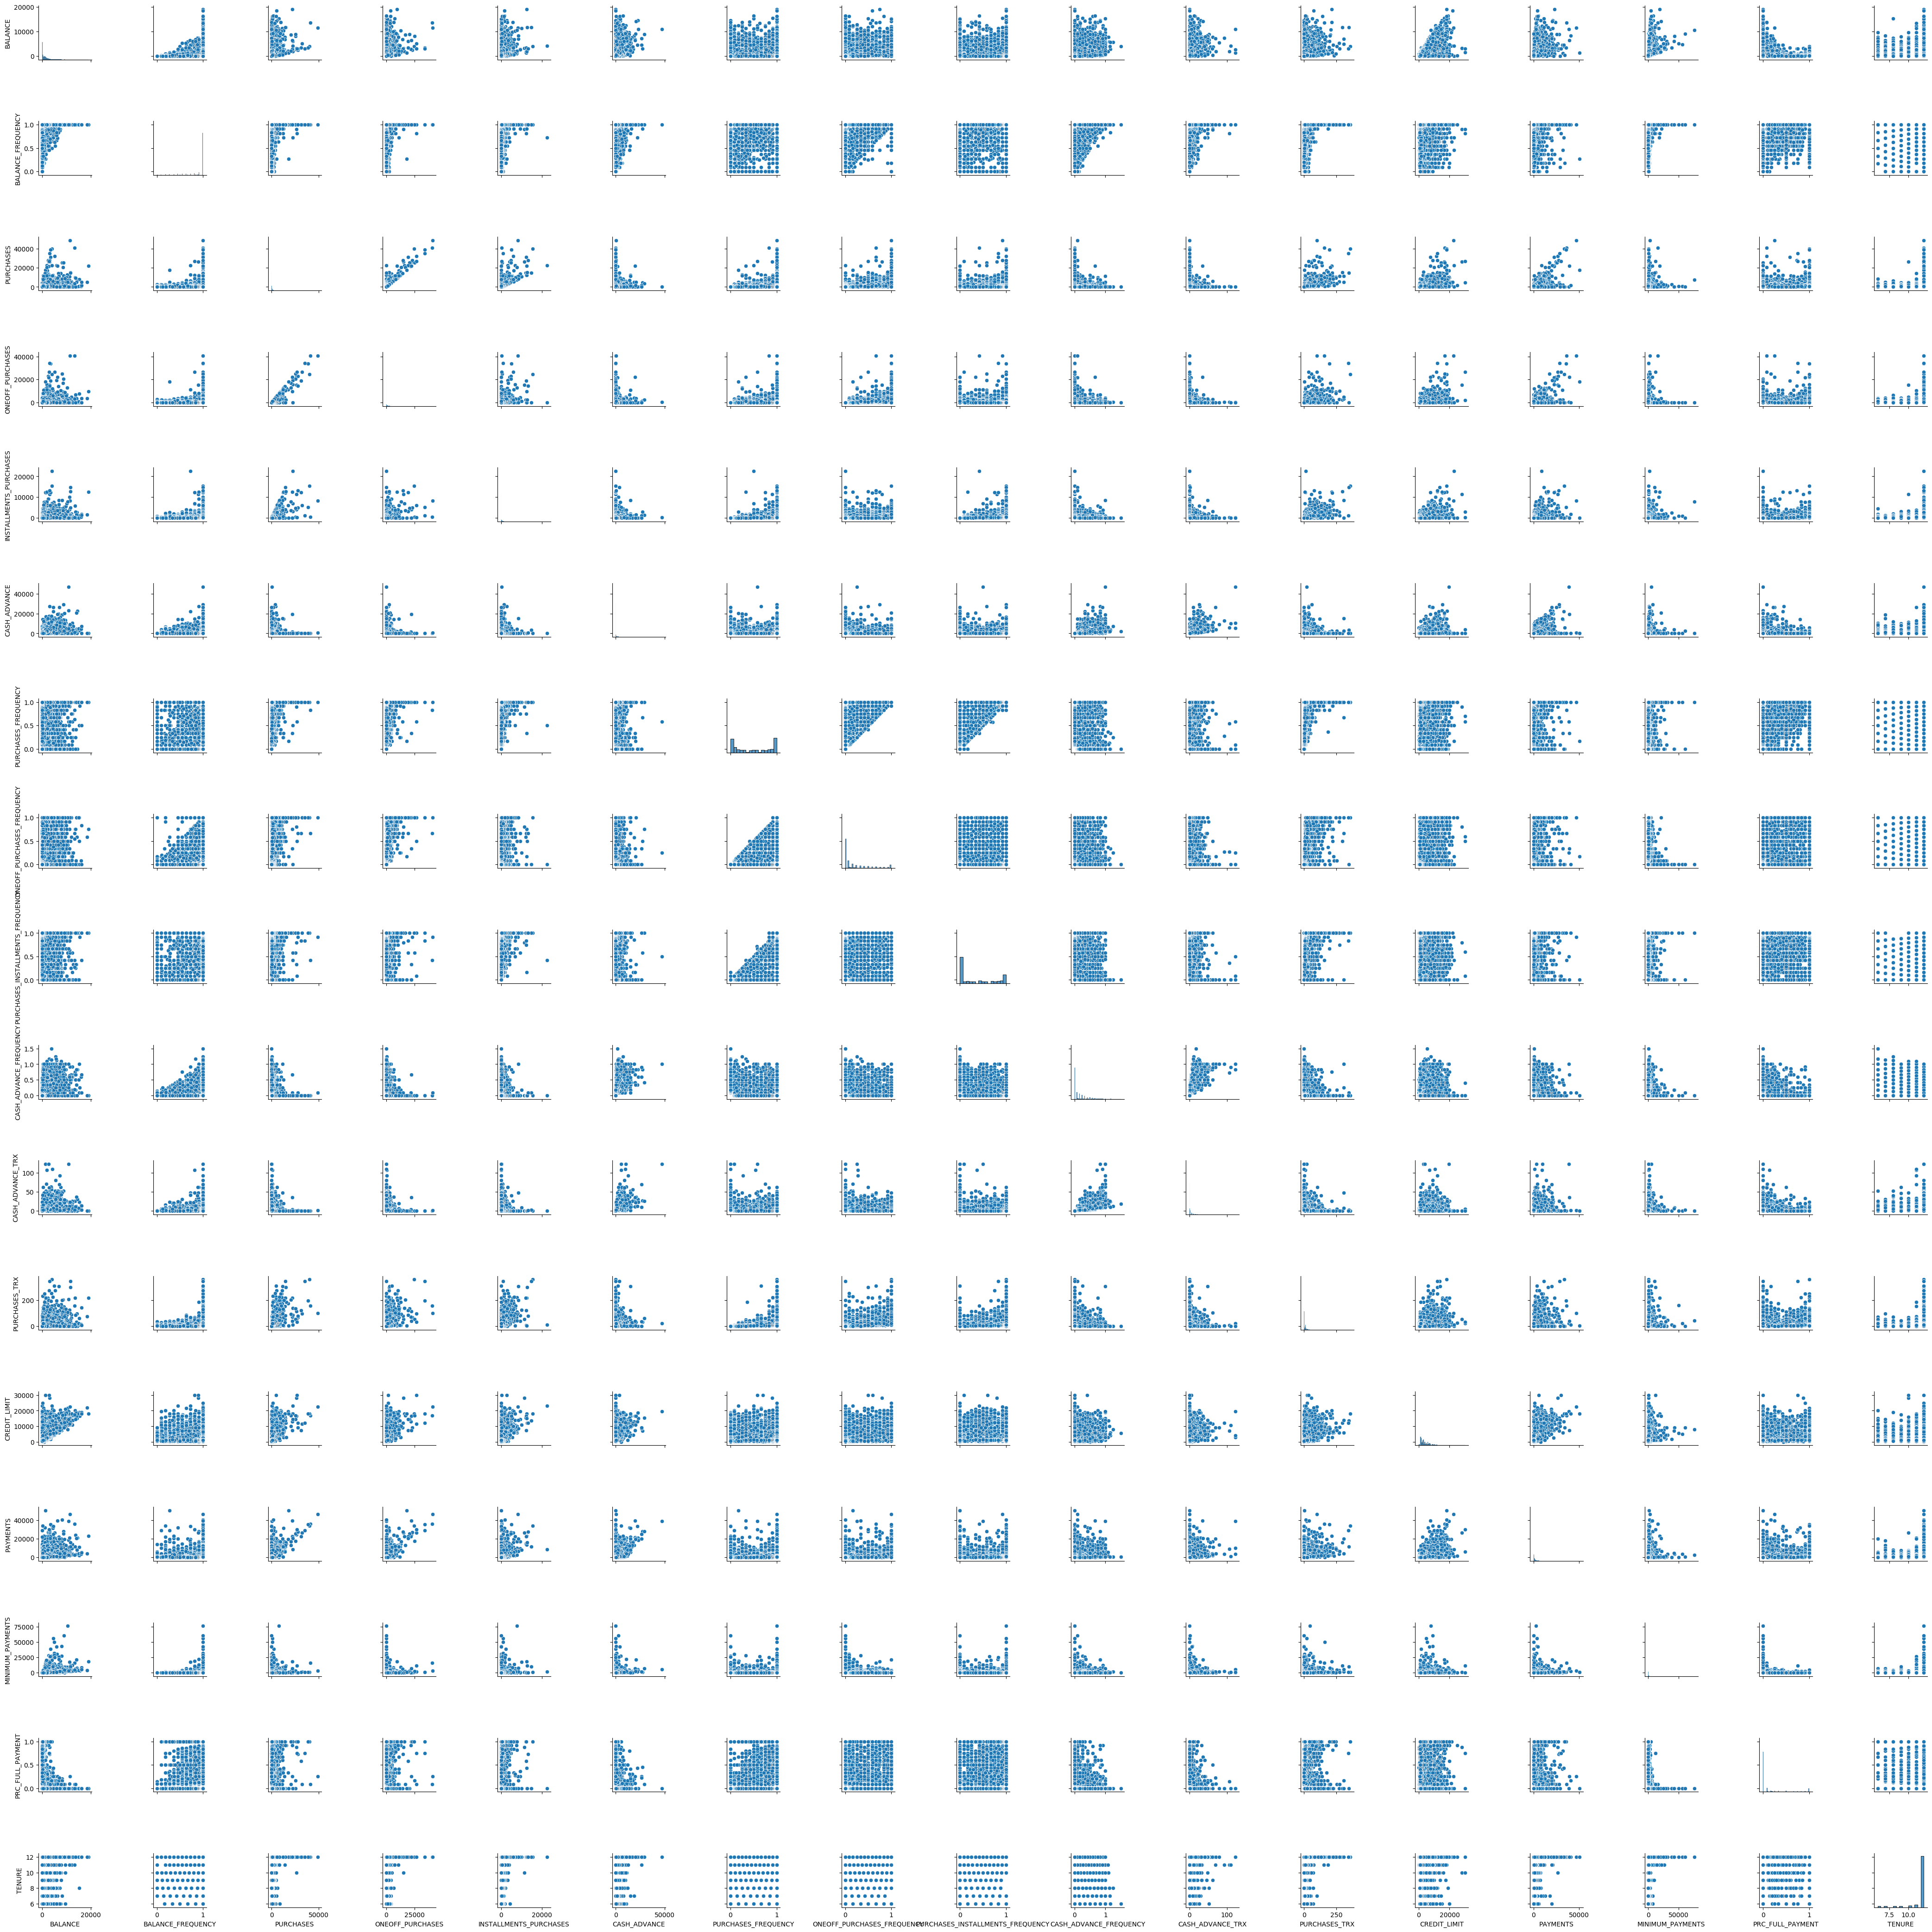

In [23]:
# Pairplot Of the Features
sns.pairplot(features)

# Modelling

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [25]:
# Using MinMaxScaler to scale the data
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(features2)

# Coverting scaled features back to the dataframe for better readability
scaled_features_df = pd.DataFrame(scaled_features, columns=features2.columns)

# Printing the first few rows of the scaled dataset
scaled_features_df.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,...,TENURE,CREDIT_UTILIZATION,INSTALLMENT_RATIO,ONEOFF_RATIO,FULL_PAYMENT_INDICATOR,log_CREDIT_LIMIT,log_BALANCE,boxcox_CASH_ADVANCE,boxcox_PURCHASES,boxcox_PAYMENTS
0,0.818182,0.000000,0.00424,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.001826,...,1.0,0.002571,1.493652e-08,0.000000,0.0,0.466811,0.379045,0.000000,0.224536,0.244633
1,0.909091,0.000000,0.00000,0.000000,0.000000,0.000000,0.250000,0.03252,0.000000,0.014034,...,1.0,0.028755,0.000000e+00,0.000000,0.0,0.771814,0.819116,0.876605,0.000000,0.553340
2,1.000000,0.018968,0.00000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.008210,...,1.0,0.020911,0.000000e+00,0.554418,0.0,0.782631,0.793799,0.000000,0.400221,0.338795
3,0.636364,0.036775,0.00000,0.083333,0.083333,0.000000,0.083333,0.00813,0.002793,0.004088,...,1.0,0.013968,0.000000e+00,0.554418,0.0,0.782631,0.752871,0.607595,0.470156,0.000000
4,1.000000,0.000393,0.00000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.003204,...,1.0,0.042830,0.000000e+00,0.554418,0.0,0.495375,0.680676,0.000000,0.118550,0.346965


In [26]:
# Printing Summary Statistics
scaled_features_df.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,...,TENURE,CREDIT_UTILIZATION,INSTALLMENT_RATIO,ONEOFF_RATIO,FULL_PAYMENT_INDICATOR,log_CREDIT_LIMIT,log_BALANCE,boxcox_CASH_ADVANCE,boxcox_PURCHASES,boxcox_PAYMENTS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.877271,0.014534,0.018270,0.490351,0.202458,0.364437,0.134972,0.026413,0.041089,0.011058,...,0.919553,0.024443,1.451154e-04,0.210522,0.080670,0.652798,0.625260,0.353170,0.297213,0.378482
std,0.236904,0.040722,0.040193,0.401371,0.298336,0.397448,0.199257,0.055485,0.069435,0.030531,...,0.223055,0.024495,1.103156e-02,0.236202,0.272343,0.128526,0.204303,0.373928,0.197475,0.136050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.888889,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.002236,...,1.000000,0.002608,0.000000e+00,0.000000,0.000000,0.540453,0.493377,0.000000,0.167913,0.295645
50%,1.000000,0.000932,0.003956,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.004088,...,1.000000,0.019027,2.765006e-09,0.061742,0.000000,0.638980,0.687352,0.000000,0.328959,0.369737
75%,1.000000,0.014166,0.020828,0.916667,0.300000,0.750000,0.222222,0.032520,0.047486,0.010322,...,1.000000,0.045102,1.493652e-08,0.484658,0.000000,0.760195,0.774072,0.749156,0.437461,0.455952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Use sklearn.decomposition.PCA.fit_transform to do a PCA transformation on the data without specifying the number of components. Print out the explained variance ratios and determine how many components to keep in order to have 95% of the explained variance ratio.


In [27]:
# Checking the covariance of the features before the PCA
covariance = np.cov(scaled_features_df.values.T)
print(covariance)

[[ 5.61235065e-02  1.00643254e-03  1.18348982e-03  2.18428028e-02
   1.43061093e-02  1.65791026e-02  9.07855425e-03  1.86068247e-03
   3.11922833e-03  9.48833818e-04 -6.58866458e-03  6.32927561e-03
   2.34827687e-03  1.78111063e-05  1.98487201e-03 -3.84189953e-03
   2.89441466e-03  3.15855032e-02  1.47139291e-02  6.44687516e-03
   8.35947964e-03]
 [ 1.00643254e-03  1.65829786e-03  5.41141375e-04  4.33032107e-03
   6.37685031e-03  2.06728907e-03 -6.71361846e-04 -1.04414916e-04
   1.54248727e-03  6.24840150e-05  1.58136546e-03  5.82693670e-04
  -4.21073434e-05 -2.10934687e-06  3.37705516e-03  1.33196559e-03
   1.37894113e-03  1.37299009e-03 -1.66194125e-03  4.11861727e-03
   2.19109491e-03]
 [ 1.18348982e-03  5.41141375e-04  1.61546158e-03  7.13717769e-03
   2.56657496e-03  8.16859484e-03 -1.06114679e-03 -1.65025209e-04
   1.75290891e-03  1.64460412e-04  2.14635170e-03  7.72289091e-04
  -5.73632479e-05 -2.28913950e-06 -9.06501456e-04  1.64755566e-03
   1.10923222e-03  8.41156191e-04 -2.6

In [28]:
# Using sklearn PCA to transform the data without specifying the number of components
# Tranform data to get variance ratios

model = PCA()
sklearn_Pca = model.fit_transform(scaled_features_df.values)

In [29]:
# Eigenvectors and Eigenvalues
eiganvectors, eiganvalues, _ = np.linalg.svd(covariance, full_matrices = False)

In [30]:
print(eiganvalues)

[4.09297840e-01 1.71314471e-01 1.34197253e-01 1.14766852e-01
 5.69887399e-02 4.38303740e-02 2.29040552e-02 2.01404702e-02
 1.60408462e-02 1.39124026e-02 1.00631349e-02 7.92935421e-03
 5.68584189e-03 5.05317591e-03 1.85326824e-03 1.00339416e-03
 8.68846757e-04 8.14798424e-04 5.81003193e-04 2.12406752e-04
 1.21506581e-04]


In [31]:
# Printing out the explained_variance_ratios
# This numbers represent the proportion of the total variance in the dataset that is explained by each Principal Component.
# Shows the proportion of variance per component

print(model.explained_variance_ratio_)

[3.94473512e-01 1.65109645e-01 1.29336773e-01 1.10610119e-01
 5.49246690e-02 4.22428850e-02 2.20744949e-02 1.94110040e-02
 1.54598639e-02 1.34085103e-02 9.69865899e-03 7.64216151e-03
 5.47990680e-03 4.87015530e-03 1.78614485e-03 9.67052304e-04
 8.37378060e-04 7.85287300e-04 5.59959881e-04 2.04713607e-04
 1.17105743e-04]


In [32]:
# Components to keep to sum to 95%
cumulative_variance = np.cumsum(model.explained_variance_ratio_)
number_of_components = np.argwhere(cumulative_variance >= 0.95)[0][0] + 1
print(f"The Number of Components for 95% variance: {number_of_components}")

The Number of Components for 95% variance: 9


Use sklearn.decomposition.PCA.fit_transform again to do a PCA transformation, this time setting n_components to keep 95% of the explained variance and save this to a new dataframe.

In [33]:
# PCA model with n_components to keep 95% of the explained variance
# PCA with 95% variance, reducing dimensionality to 95% variance.

model2 = PCA(n_components = number_of_components)


# Tranforming the data 
sklearn_Pca2 = model2.fit_transform(scaled_features_df.values)

In [34]:
# Printing out the explained_variance_ratios
# This numbers represent the proportion of the total variance in the dataset that is explained by each Principal Component.
# The result is the same as above after finding how many components make up to 95% of variance.

print(model2.explained_variance_ratio_)

[0.39447351 0.16510964 0.12933677 0.11061012 0.05492467 0.04224288
 0.02207449 0.019411   0.01545986]


In [35]:
# Save to DataFrame 
pca_Df = pd.DataFrame(sklearn_Pca2, columns = [f'PC{i+1}' for i in range(number_of_components)])

In [36]:
pca_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.285300,0.500206,-0.112702,-0.366442,-0.159541,0.069012,-0.141273,-0.006918,0.010615
1,-0.831764,-0.095617,-0.115096,0.335989,-0.175672,-0.095563,-0.030709,0.176572,0.060778
2,0.426871,-0.255138,0.894374,-0.341730,-0.011249,0.102807,-0.315434,0.108806,-0.038394
3,-0.567772,0.069768,0.285126,-0.151417,0.081316,-0.171994,0.252051,-0.199747,-0.210274
4,-0.380567,0.303115,0.306235,-0.374695,-0.286412,0.232540,0.117184,-0.155500,-0.007408


In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [38]:
# Agglomerative Clustering
# Creating 10 Parameters list for genearting different models
parameters_list = [{'n_clusters': 3, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': 4, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': 4, 'distance_threshold': None, 'affinity' : 'manhattan', 'linkage' : 'single'},
                   {'n_clusters': 3, 'distance_threshold':None, 'affinity' : 'manhattan', 'linkage' : 'single'},
                   {'n_clusters': 4, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': None, 'distance_threshold': 1.7, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': 5, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'single'},
                   {'n_clusters': None, 'distance_threshold': 1.5, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': 8, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': None, 'distance_threshold': 2, 'affinity' : 'euclidean', 'linkage' : 'complete'}]

# Results table
results = pd.DataFrame(columns=[
    'Model', 
    'n_clusters_param', 
    'distance_threshold', 
    'linkage', 
    'affinity', 
    'n_clusters_actual', 
    'silhouette_score'
])


# Training the models with different parameters
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

for i, params in enumerate(parameters_list):
    model = AgglomerativeClustering(
        n_clusters=params['n_clusters'],
        distance_threshold=params['distance_threshold'],
        linkage=params['linkage'],
        affinity=params['affinity'],
    )
    
    labels = model.fit_predict(pca_Df)
    
    n_clusters_actual = len(set(labels))  # Get the actual number of clusters

    # Compute silhouette score (only if more than 1 cluster exists)
    sil_score = silhouette_score(pca_Df, labels) if n_clusters_actual > 1 else np.nan

    # Store results
    results = results.append({
        'Model': f'Model_{i+1}',
        'n_clusters_param': params['n_clusters'],
        'distance_threshold': params['distance_threshold'],
        'linkage': params['linkage'],
        'affinity': params['affinity'],
        'n_clusters_actual': n_clusters_actual,
        'silhouette_score': sil_score
    }, ignore_index=True)
        

In [39]:
# Result table Agglomerative Clustering
results

,Model,n_clusters_param,distance_threshold,linkage,affinity,n_clusters_actual,silhouette_score
0,Model_1,3,NaN,complete,euclidean,3,0.233781
1,Model_2,4,NaN,complete,euclidean,4,0.278214
2,Model_3,4,NaN,single,manhattan,4,0.246377
3,Model_4,3,NaN,single,manhattan,3,0.334581
4,Model_5,4,NaN,complete,euclidean,4,0.278214
5,Model_6,None,1.7,complete,euclidean,23,0.259962
6,Model_7,5,None,single,euclidean,5,0.224387
7,Model_8,None,1.5,complete,euclidean,38,0.242049
8,Model_9,8,None,complete,euclidean,8,0.258637
9,Model_10,None,2,complete,euclidean,12,0.247465


In [40]:
# Divisive Clustering
# Creating 10 Parameters list
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score


# Divisive Clustering - 10 Parameter list
param_list = [
    {'t': 1, 'criterion': 'distance', 'depth': 2},
    {'t': 2, 'criterion': 'maxclust', 'depth': 2},
    {'t': 4, 'criterion': 'distance', 'depth': 3},
    {'t': 2, 'criterion': 'distance', 'depth': 3},
    {'t': 3, 'criterion': 'maxclust', 'depth': 2},
    {'t': 3, 'criterion': 'distance', 'depth': 5},
    {'t': 5, 'criterion': 'distance', 'depth': 2},
    {'t': 3, 'criterion': 'distance', 'depth': 3},
    {'t': 5, 'criterion': 'distance', 'depth': 4},
    {'t': 4, 'criterion': 'maxclust', 'depth': 0.6}
]

# Results table
results2 = pd.DataFrame(columns=['Model', 't', 'criterion', 'depth', 'silhouette_score'])

# Perform linkage once (Ward's method)
Z = linkage(pca_Df, method='ward')

# Training the models with different parameters
for i, params in enumerate(param_list):
    # Apply fcluster with the current parameters
    model_div = fcluster(Z, t=params['t'], criterion=params['criterion'])
    
    # Get the actual number of clusters
    n_clusters_actual = len(set(model_div))
    
    # Compute silhouette score (only if more than 1 cluster exists)
    sil_score = silhouette_score(pca_Df, model_div) if n_clusters_actual > 1 else np.nan
    
    # Append results to the original DataFrame
    results2 = results2.append({
        'Model': f'Model_{i+1}',
        't': params['t'],
        'criterion': params['criterion'],
        'depth': params['depth'],
        'silhouette_score': sil_score
    }, ignore_index=True)


In [41]:
# Converting the list of results to a DataFrame for easy viewing
results_Divisive = pd.DataFrame(results2)

In [42]:
# Display the results
results_Divisive

,Model,t,criterion,depth,silhouette_score
0,Model_1,1,distance,2,0.178804
1,Model_2,2,maxclust,2,0.272175
2,Model_3,4,distance,3,0.199768
3,Model_4,2,distance,3,0.187655
4,Model_5,3,maxclust,2,0.299881
5,Model_6,3,distance,5,0.202550
6,Model_7,5,distance,2,0.233702
7,Model_8,3,distance,3,0.202550
8,Model_9,5,distance,4,0.233702
9,Model_10,4,maxclust,0.6,0.283966


In [43]:
# DBSCAN 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Creating 10 Parameters list for genearting different models
param_grid = [
    {'eps': 0.13, 'min_samples': 4, 'metric': 'euclidean', 'p': 3},
    {'eps': 0.14, 'min_samples': 2, 'metric': 'euclidean', 'p': 2},
    {'eps': 0.15, 'min_samples': 3, 'metric': 'euclidean', 'p': 4},
    {'eps': 0.145, 'min_samples': 4, 'metric': 'euclidean', 'p': None},
    {'eps': 0.1495, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.148, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.18, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.20, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.38, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.25, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.4, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.45, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.5, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.55, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.58, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.59, 'min_samples': 3, 'metric': 'euclidean', 'p': 2},
    {'eps': 0.60, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.60, 'min_samples': 5, 'metric': 'euclidean', 'p': None},
    {'eps': 0.60, 'min_samples': 3.5, 'metric': 'euclidean', 'p': 5},
    {'eps': 0.65, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.65, 'min_samples': 3.5, 'metric': 'euclidean', 'p': 3},
    {'eps': 0.66, 'min_samples': 3, 'metric': 'euclidean', 'p': None},
    {'eps': 0.60, 'min_samples': 6, 'metric': 'euclidean', 'p': None},
    {'eps': 0.60, 'min_samples': 7, 'metric': 'euclidean', 'p': None},
    {'eps': 0.60, 'min_samples': 5, 'metric': 'euclidean', 'p': 6},
    {'eps': 0.60, 'min_samples': 3, 'metric': 'euclidean', 'p': 4},
    {'eps': 0.60, 'min_samples': 2, 'metric': 'euclidean', 'p': 3},
    {'eps': 0.45, 'min_samples': 2, 'metric': 'euclidean', 'p': 3},
    {'eps': 0.60, 'min_samples': 2, 'metric': 'euclidean', 'p': 8},
    {'eps': 0.60, 'min_samples': 4, 'metric': 'euclidean', 'p': 9},
    {'eps': 0.69, 'min_samples': 2, 'metric': 'euclidean', 'p': 3},
    {'eps': 0.90, 'min_samples': 2, 'metric': 'euclidean', 'p': 3},
    {'eps': 0.850, 'min_samples': 2, 'metric': 'euclidean', 'p': 4},
    {'eps': 0.72, 'min_samples': 3, 'metric': 'euclidean', 'p': 4},
    
]


# Storing the results
results = []

# Running the DBSCAN with different hyperparameters
for params in param_grid:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'], metric=params['metric'], p=params['p'])
    labels = dbscan.fit_predict(pca_Df)

 # Count how many unique clusters (excluding noise) are formed
    non_noise_mask = labels != -1
    num_clusters = len(set(labels[non_noise_mask]))
    num_noise = np.sum(labels == -1)
    
    # Compute the silhouette score on only the non-noise points if there are at least 2 clusters
    if num_clusters > 1:
        sil = silhouette_score(pca_Df[non_noise_mask], labels[non_noise_mask])
    else:
        sil = np.nan  # Not meaningful if only one or no clusters exist
    
    # Append the results
    results.append({
        'eps': params['eps'],
        'min_samples': params['min_samples'],
        'metric': params['metric'],
        'p': params['p'],
        'num_clusters': num_clusters,
        'num_noise': num_noise,
        'silhouette_score': sil
    })

# Converting the list of results to a DataFrame for easy viewing
results_DBSCAN = pd.DataFrame(results)

In [44]:
results_DBSCAN

,eps,min_samples,metric,p,num_clusters,num_noise,silhouette_score
0,0.1300,4.0,euclidean,3.0,105,3483,-0.225461
1,0.1400,2.0,euclidean,2.0,377,2275,-0.337577
2,0.1500,3.0,euclidean,4.0,143,2384,-0.382874
3,0.1450,4.0,euclidean,NaN,79,2905,-0.270851
4,0.1495,3.0,euclidean,NaN,141,2401,-0.382856
5,0.1480,3.0,euclidean,NaN,145,2454,-0.294380
6,0.1800,3.0,euclidean,NaN,78,1521,-0.339938
7,0.2000,3.0,euclidean,NaN,59,1125,-0.293065
8,0.3800,3.0,euclidean,NaN,7,93,0.169292
9,0.2500,3.0,euclidean,NaN,28,545,-0.259526


In [45]:
# KMeans Algorithm
# Importing the library to be used for clustering the data

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# the range of clusters to test
n_cluster_range = range(2, 11)


# Empty list to store silhouette scores
silhouette_scores = []


# Looping over the range of cluster numbers
for n_clusters in n_cluster_range:
    '''
    This is a For loop to iterate over the range of cluster numbers and calculate KMeans clustering and silhouette scores
    Step 1: Initialize KMeans with the current number of clusters (n_clusters)
    Step 2: Fit the KMeans model on the PCA-transformed data and predict cluster labels
    Step 3: Calculate the silhouette score for the current clustering
    Step 4: Append the silhouette score to the list for later analysis
    '''
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Step 1
    cluster_labels = kmeans.fit_predict(pca_Df)              # Step 2
    
    score = silhouette_score(pca_Df, cluster_labels)         # Step 3
    silhouette_scores.append(score)                          # Step 4

    
    
# Creating a DataFrame to tabulate the results
results_df = pd.DataFrame({
    'Number of Clusters': list(n_cluster_range),
    'Silhouette Score': silhouette_scores
})


# Displaying the tabulated results
print("Silhouette Scores for Each Number of Clusters:")
print(results_df.to_string(index=False))

Silhouette Scores for Each Number of Clusters:
 Number of Clusters  Silhouette Score
                  2          0.308080
                  3          0.327343
                  4          0.313157
                  5          0.312408
                  6          0.324370
                  7          0.311208
                  8          0.317113
                  9          0.321072
                 10          0.330638


### Best Model Selection: KMeans with 3 Clusters

## Chosen Model:
**KMeans with `n_clusters=3`**  
*Silhouette Score = 0.327343*

---

## Our Justification:

### Silhouette Score:
- KMeans with 3 clusters (`0.3273`) is competitive with the best Agglomerative (`0.3346`) and Divisive (`0.2999`) models.
- While **Agglomerative Model_4** has a slightly higher score (~0.007), the difference is not alot.

### Practicality for Marketing:
- **Three clusters** align well with behavioral insights:
  - **Frequent Purchasers**
  - **Cash Advance Users**
  - **Full Balance Payers**
- A **10-cluster** model (KMeans best score) might lead to over-segmentation, diluting our focus.

### PCA Integration:
- **Principal Component Analysis (PCA)** reduces noise and dimensionality.
- PCA retains **95% of variance**, improving KMeans clustering in a well-structured Euclidean space.
- Hierarchical methods may struggle with linkage/affinity choices, whereas KMeans naturally benefits from PCA's transformation.

### Simplicity and Scalability:
- **KMeans is computationally efficient** and easy to implement/visualize.
- More scalable compared to hierarchical clustering, making it ideal for:
  - **Iterative refinement**
  - **Deployment in a marketing pipeline**
  - **Visualization and interpretation**

### Behavioral Alignment:
- **Correlation analysis** identified distinct consumer segments:
  - **Installment Users**
  - **Cash Advance Users**
  - **High Credit Utilizers**
- A **three-cluster model** naturally aligns with these insights.
- The silhouette scores across all models validate **small cluster counts** as the most effective segmentation approach.

---
In our Assignment 2: Our best model was Heirarchical Clustering (Complete Linkage, Euclidean Distance, n_cluster = 3, silhoutte score = 0.22. 

In this model our silhoutte score have increase to 0.32, KMeans with 3 cluster. The PCA helped increased the silhoutte score making the clusters well separated. 

In this use case: Credit Card Dataset. KMeans: Assumes our customers form distinct, roughly spherical groups (e.g., Frequent Purchasers, Cash Advance Users), which PCA enhances by focusing on variance-driven behaviors (e.g., 95% variance in 9 components). PCA: Assumes these behaviors (e.g., purchases, payments) are linearly combinable into meaningful components, reducing noise and aiding KMeans’ clustering. 

##### Effect of outliers that possibly explain low silhouette score:
- KMeans and PCA are sensitive to extreme values.

- KMeans minimizes the sum of squared distances from points to centroids (within-cluster variance). Outliers, being far from typical points, disproportionately pull centroids toward them, distorting cluster shapes and boundaries.

- PCA identifies principal components by maximizing variance. Outliers inflate variance, skewing components toward extreme values rather than typical patterns. 

- Example: An outlier with extreme Balance could dominate our first principal component, misrepresenting the majority of customers.

# Conclusion

In [46]:
# Using our best model
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
clusters_k3 = kmeans_k3.fit_predict(pca_Df)

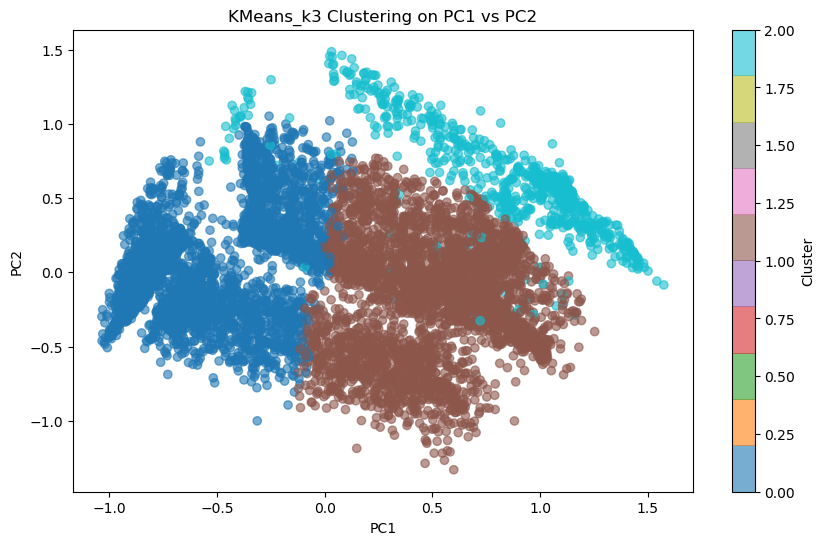

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_Df['PC1'], pca_Df['PC2'], c=clusters_k3, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans_k3 Clustering on PC1 vs PC2')
plt.show()

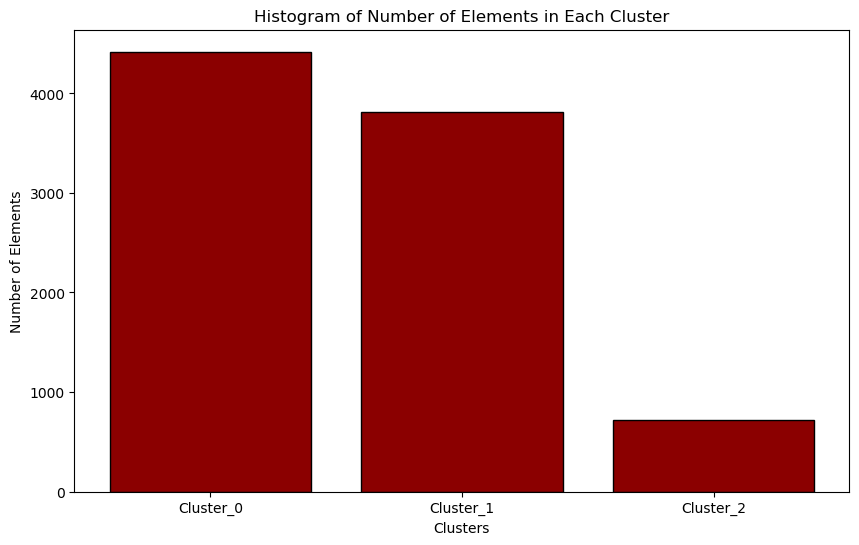

Cluster Sizes:
Cluster_0: 4419
Cluster_1: 3810
Cluster_2: 721


In [48]:
# Using histogram to show the number of elements in each cluster

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(clusters_k3, bins=np.arange(-0.5, 3.5, 1), color='darkred', edgecolor='black', rwidth=0.8)
plt.xticks(range(3), [f'Cluster_{i}' for i in range(3)])  # Custom labels
plt.xlabel('Clusters')
plt.ylabel('Number of Elements')
plt.title('Histogram of Number of Elements in Each Cluster')
plt.show()

# Printing the cluster sizes for verification
unique, counts = np.unique(clusters_k3, return_counts=True)
print("Cluster Sizes:")
for label, count in zip(unique, counts):
    print(f"Cluster_{label}: {count}")

# Conclusion

In [50]:
# Adding cluster assignments to scaled_features_df to see summary stats
scaled_features_df_with_clusters = scaled_features_df.copy()
scaled_features_df_with_clusters['Cluster'] = clusters_k3

In [53]:
# Creating a dictionary to store DataFrames for each cluster
cluster_dfs = {}


# Getting unique cluster labels
unique_clusters = np.unique(clusters_k3)


# Splitting the DataFrame into separate DataFrames for each cluster
for cluster_num in unique_clusters:
    cluster_dfs[f'Cluster_{cluster_num}'] = scaled_features_df_with_clusters[
        scaled_features_df_with_clusters['Cluster'] == cluster_num
    ].drop('Cluster', axis=1)  

    
# Verifying the sizes match your histogram
for cluster_name, df in cluster_dfs.items():
    print(f"{cluster_name} has {len(df)} elements")


Cluster_0 has 4419 elements
Cluster_1 has 3810 elements
Cluster_2 has 721 elements


In [55]:
# Summary Stats for Cluster_0
cluster_dfs['Cluster_0'].describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION,INSTALLMENT_RATIO,ONEOFF_RATIO,FULL_PAYMENT_INDICATOR,log_CREDIT_LIMIT,log_BALANCE,boxcox_CASH_ADVANCE,boxcox_PURCHASES,boxcox_PAYMENTS
count,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000
mean,0.844699,0.005711,0.001854,0.132114,0.085257,0.045937,0.205471,0.039894,0.007328,1.148599e-02,0.038255,0.904692,0.030381,0.000294,0.219065,0.000226,0.641999,0.659922,0.531531,0.165392,0.358234
std,0.267406,0.017924,0.006701,0.167821,0.136497,0.104884,0.215271,0.065185,0.019484,2.834650e-02,0.105041,0.237879,0.026126,0.015699,0.262476,0.015043,0.126728,0.201534,0.341962,0.170532,0.140064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.805501e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.723143e-03,0.000000,1.000000,0.008130,0.000000,0.000000,0.000000,0.530340,0.593020,0.000000,0.000000,0.281301
50%,1.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.166667,0.016260,0.002793,5.204877e-03,0.000000,1.000000,0.029946,0.000000,0.000000,0.000000,0.638980,0.716849,0.693763,0.171803,0.348392
75%,1.000000,0.005073,0.000000,0.250000,0.100000,0.000000,0.333333,0.048780,0.008380,1.146454e-02,0.000000,1.000000,0.051899,0.000000,0.554418,0.000000,0.747646,0.794339,0.795087,0.308337,0.435185
max,1.000000,0.542225,0.133333,0.857143,0.857143,0.583333,1.000000,1.000000,0.863128,7.987782e-01,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,0.958337,0.984248,1.000000,0.850220,1.000000


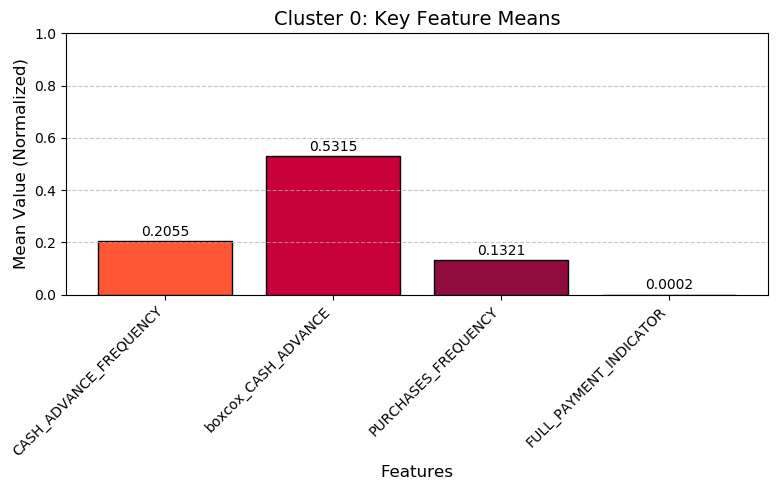

In [61]:
# Defining cluster_0_stats using cluster_dfs['Cluster_0'].describe()
cluster_0_stats = pd.DataFrame(
    cluster_dfs['Cluster_0']
    .describe()
    .round(4)
)

# Selecting key variables' means
key_vars = ['CASH_ADVANCE_FREQUENCY', 'boxcox_CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'FULL_PAYMENT_INDICATOR']
means = cluster_0_stats.loc['mean', key_vars]

# Creating the bar plot
plt.figure(figsize=(8, 5))
plt.bar(key_vars, means, color=['#FF5733', '#C70039', '#900C3F', '#581845'], edgecolor='black')

# Customizing the plot
plt.title('Cluster 0: Key Feature Means', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Mean Value (Normalized)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of bars
for i, v in enumerate(means):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=10)

# Adjusting layout
plt.tight_layout()
plt.show()

#### Insights Justification Cluster 0 Based on the visuals

#### High Cash Advance Use  
- **`CASH_ADVANCE_FREQUENCY` (0.2055):**  
  - A noticeable bar height shows frequent cash advances, supporting the **"Cash Advance Users"** label.  
- **`boxcox_CASH_ADVANCE` (0.5315):**  
  - The tallest bar emphasizes **significant cash advance amounts**, reinforcing reliance on this feature over purchases.  

#### Low Purchase Frequency  
- **`PURCHASES_FREQUENCY` (0.1321):**  
  - A short bar compared to `CASH_ADVANCE_FREQUENCY` visually confirms **minimal purchase activity**, justifying the need to **incentivize spending**.  

#### Minimal Full Payments  
- **`FULL_PAYMENT_INDICATOR` (0.0002):**  
  - A nearly flat bar (close to 0) starkly illustrates that **full payments are rare**, aligning with the **revolving debt** insight.  

---

#### Why Did We Use These Variables?  
**Direct Relevance** – They map directly to key insights (**cash advances, purchases, payments**) for clear justification.  
**For Simplicity** – **Four key bars** Defenitly keep the graph uncluttered, focusing on the **core story of Cluster 0**.  
**Mean Focus** – The mean summarizes **average behavior** across **4,419 customers**, making it ideal for broad insights. *(Percentiles or standard deviation could add nuance but would complicate the visual.)*  


In [56]:
# Summary Stats for Cluster_1
cluster_dfs['Cluster_1'].describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION,INSTALLMENT_RATIO,ONEOFF_RATIO,FULL_PAYMENT_INDICATOR,log_CREDIT_LIMIT,log_BALANCE,boxcox_CASH_ADVANCE,boxcox_PURCHASES,boxcox_PAYMENTS
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3.810000e+03,3810.000000,3810.0,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,0.924105,0.021635,0.033435,0.851713,0.310412,0.692308,0.075776,0.015238,0.073861,0.012186,0.134951,0.939939,0.021638,9.505613e-09,0.202240,0.0,0.660668,0.616877,0.201081,0.425268,0.393178
std,0.181015,0.048789,0.048826,0.182276,0.351489,0.310321,0.163238,0.042577,0.080391,0.035222,0.220165,0.196380,0.021872,5.527233e-09,0.203408,0.0,0.128671,0.201555,0.330678,0.115997,0.128617
min,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.278382,0.000000,0.000000,0.088887,0.000000
25%,1.000000,0.000000,0.009229,0.750000,0.000000,0.500000,0.000000,0.000000,0.030726,0.002188,0.000000,1.000000,0.002261,4.448147e-09,0.000000,0.0,0.549954,0.477384,0.000000,0.341614,0.309653
50%,1.000000,0.005605,0.019556,0.916667,0.166667,0.750000,0.000000,0.000000,0.044693,0.003816,0.000000,1.000000,0.014107,1.069937e-08,0.157276,0.0,0.667561,0.667063,0.000000,0.415289,0.387442
75%,1.000000,0.026022,0.040727,1.000000,0.583333,1.000000,0.083333,0.008130,0.086592,0.011272,0.200000,1.000000,0.038207,1.493652e-08,0.389311,0.0,0.765424,0.767684,0.557278,0.500717,0.468093
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.577236,0.969274,1.000000,0.800000,1.000000,0.127818,4.426909e-08,0.554418,0.0,1.000000,1.000000,0.972343,1.000000,0.982572


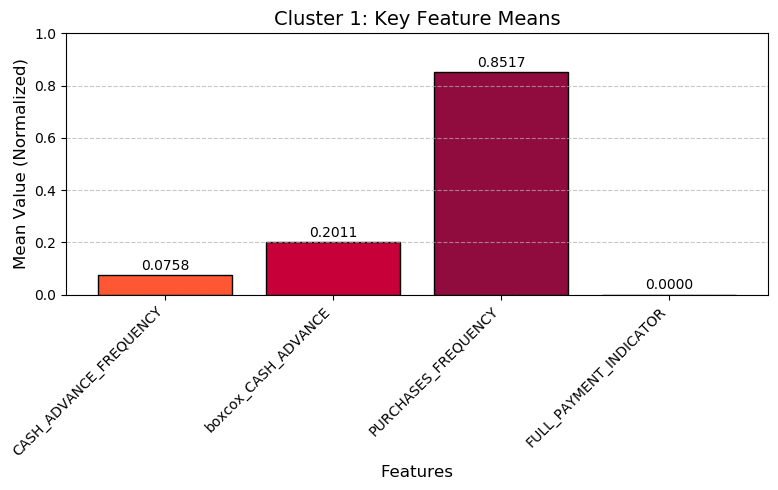

In [64]:
# Defining cluster_1_stats using cluster_dfs['Cluster_1'].describe()
cluster_1_stats = pd.DataFrame(
    cluster_dfs['Cluster_1']
    .describe()
    .round(4)
)

# Selecting key variables' means
key_vars = ['CASH_ADVANCE_FREQUENCY', 'boxcox_CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'FULL_PAYMENT_INDICATOR']
means = cluster_1_stats.loc['mean', key_vars]

# Creating the bar plot
plt.figure(figsize=(8, 5))
plt.bar(key_vars, means, color=['#FF5733', '#C70039', '#900C3F', '#581845'], edgecolor='black')


# Customizing the plot
plt.title('Cluster 1: Key Feature Means', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Mean Value (Normalized)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Adding value labels on top of bars
for i, v in enumerate(means):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=10)

    
# Adjusting layout
plt.tight_layout()
plt.show()

##### **Cluster 1: Summary Statistics & Insights**

#### **PURCHASES_FREQUENCY (Frequency of Purchases)**
- **Mean:** 0.8517 → High average purchase frequency.
- **Std:** 0.1823 → Moderate variability; most customers purchase frequently, but some vary.
- **Min:** 0.3333 → Even the least frequent user still makes purchases regularly.
- **25%:** 0.7500 → 25% of customers purchase at least 75% of the time.
- **50% (Median):** 0.9167 → Half are nearly maxed out (11/12 transactions).
- **75%:** 1.0000 → 75% purchase every time possible.
- **Max:** 1.0000 → Some hit the maximum frequency.

#### **Insight**
The tight distribution (**75% at 1.0, median 0.9167**) shows a **reliable base of frequent purchasers** with minimal deviation below 0.75, making them ideal for **targeting consistent spenders**.

---

#### **PURCHASES_INSTALLMENTS_FREQUENCY (Frequency of Installment Purchases)**
- **Mean:** 0.6923 → Strong installment use.
- **Std:** 0.3103 → Higher variability than purchase frequency; some use installments less.
- **Min:** 0.0 → Some customers never use installments.
- **25%:** 0.5000 → 25% use installments at least half the time.
- **50% (Median):** 0.7500 → Majority prefer installments.
- **75%:** 1.0000 → 75% use installments every time.
- **Max:** 1.0000 → Some fully rely on installment plans.

#### **Insight**
The spread (**std 0.3103, min 0.0 to max 1.0**) indicates **two subgroups**:  
**Heavy installment users (75% at 1.0)**  
**Non-users (min 0.0)**  
**Tailored installment offers** could effectively engage both groups.

---

#### **CASH_ADVANCE_FREQUENCY (Frequency of Cash Advances)**
- **Mean:** 0.0758 → Low average use.
- **Std:** 0.1632 → Moderate variability; some use cash advances more often.
- **Min:** 0.0 → Many never use cash advances.
- **25%:** 0.0 → 25% have no cash advance activity.
- **50% (Median):** 0.0 → Half never use them, pulling the mean down.
- **75%:** 0.0833 → Only 25% use cash advances occasionally (1/12 times).
- **Max:** 1.0000 → Rare outliers use them constantly.

#### **Insight**
The **skewed distribution (median 0.0, 75% at 0.0833, max 1.0)** shows **most avoid cash advances**, but a **small subset relies heavily**, offering a **niche opportunity**.

---

#### **FULL_PAYMENT_INDICATOR (Binary: Pays in Full or Not)**
- **Mean:** 0.0 → No one pays in full.
- **Std:** 0.0 → No variability; all values are 0.
- **Min:** 0.0 → Minimum is 0.
- **25%:** 0.0 → 25th percentile is 0.
- **50% (Median):** 0.0 → Median is 0.
- **75%:** 0.0 → 75th percentile is 0.
- **Max:** 0.0 → Maximum is 0.

#### **Insight**
**All statistics being zero** confirms that **no customers in this cluster pay their balance in full**, strongly indicating **revolving debt behavior**.

---

#### **boxcox_PURCHASES (Transformed Purchase Amount)**
- **Mean:** 0.4253 → Moderate to high purchase volume.
- **Std:** 0.1160 → Low variability; purchases are consistently substantial.
- **Min:** 0.0889 → Even the lowest spenders buy something.
- **25%:** 0.3416 → 25% spend at least 34% of the normalized scale.
- **50% (Median):** 0.4153 → Median aligns with mean, suggesting a balanced distribution.
- **75%:** 0.5007 → 75% spend up to half the max, with some higher.
- **Max:** 1.0000 → Some reach the maximum purchase amount.

#### **Insight**
**Tight spread (std 0.1160) and high median (0.4153)** indicating **steady, significant spending**, reinforcing their **“Frequent Purchasers”** label.

-------------------------------------------------------------------------------------------------------------------------------

#### **CREDIT_UTILIZATION (Credit Used vs. Limit)**
- **Mean:** 0.0216 → Very low utilization.
- **Std:** 0.0219 → Low variability; 

-------------------------------------------------------------------------------------------------------------------------------

#### **ourMarketing Strategy**  

**1. Tiered Installment Plans**  
   - **Heavy users:** Offer **lower interest rates** or **bonus rewards** for installment purchases.  
   - **New users:** Incentivize with **introductory 0% APR installment plans**.  

**2. Upsell Credit Limits**  
   - Leverage their **low utilization** to **increase credit limits**, encouraging higher spending.  

**Conclusion**  
 Cluster 1 represents financially active customers who frequently use their cards, prefer installments, and maintain low credit utilization.
The strategy focuses on rewarding spending, increasing credit limits, and offering tailored installment & financing options to optimize engagement.

In [57]:
# Summary Stats for Cluster_2
cluster_dfs['Cluster_2'].describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION,INSTALLMENT_RATIO,ONEOFF_RATIO,FULL_PAYMENT_INDICATOR,log_CREDIT_LIMIT,log_BALANCE,boxcox_CASH_ADVANCE,boxcox_PURCHASES,boxcox_PAYMENTS
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,7.210000e+02,721.000000,721.0,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.829415,0.031087,0.038744,0.776418,0.350311,0.583943,0.015696,0.002842,0.074830,0.002474,0.960519,0.902913,0.002868,8.961289e-09,0.201929,1.0,0.677400,0.457123,0.063675,0.428453,0.424926
std,0.255036,0.070909,0.062457,0.305193,0.412887,0.383036,0.069723,0.016367,0.097908,0.003309,0.061083,0.251641,0.003822,6.237922e-09,0.225682,0.0,0.132411,0.136359,0.200676,0.156184,0.127862
min,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,0.818182,0.000000,0.000005,0.000000e+00,0.000000,1.0,0.278382,0.007313,0.000000,0.000000,0.134430
25%,0.700000,0.000000,0.006292,0.583333,0.000000,0.166667,0.000000,0.000000,0.022346,0.001814,0.916667,1.000000,0.000608,2.084730e-09,0.000000,1.0,0.575425,0.364655,0.000000,0.337665,0.326859
50%,1.000000,0.002596,0.020104,1.000000,0.083333,0.666667,0.000000,0.000000,0.039106,0.002206,1.000000,1.000000,0.001601,1.128323e-08,0.070839,1.0,0.684078,0.460431,0.000000,0.421380,0.410024
75%,1.000000,0.032603,0.046920,1.000000,0.833333,1.000000,0.000000,0.000000,0.089385,0.002399,1.000000,1.000000,0.003661,1.493652e-08,0.435523,1.0,0.771814,0.550983,0.000000,0.525147,0.501452
max,1.000000,0.829313,0.688764,1.000000,1.000000,1.000000,0.916667,0.268293,1.000000,0.059591,1.000000,1.000000,0.040240,1.652850e-08,0.554418,1.0,0.989182,0.841944,0.888211,0.959975,0.924167


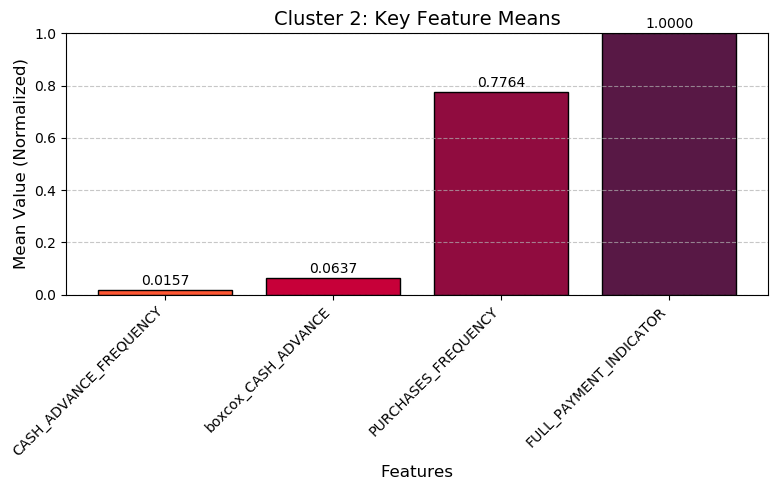

In [65]:
# Defining cluster_2_stats using cluster_dfs['Cluster_2'].describe()
cluster_2_stats = pd.DataFrame(
    cluster_dfs['Cluster_2']
    .describe()
    .round(4)
)

# Selecting key variables' means
key_vars = ['CASH_ADVANCE_FREQUENCY', 'boxcox_CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'FULL_PAYMENT_INDICATOR']
means = cluster_2_stats.loc['mean', key_vars]

# Creating the bar plot
plt.figure(figsize=(8, 5))
plt.bar(key_vars, means, color=['#FF5733', '#C70039', '#900C3F', '#581845'], edgecolor='black')


# Customizing the plot
plt.title('Cluster 2: Key Feature Means', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Mean Value (Normalized)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Adding value labels on top of bars
for i, v in enumerate(means):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=10)

    
# Adjusting layout
plt.tight_layout()
plt.show()

##### **Graph Interpretation: Cluster 2**

##### **FULL_PAYMENT_INDICATOR (1.0)**
- **Bar:** Tallest, reaching the top at 1.0 
- **Meaning:** Every customer in Cluster 2 **pays their balance in full every time**. The mean is at the **maximum possible value (1.0)**.
- **Insight:** This bar **dominates the plot**, confirming their defining trait of **consistent, full payment behavior**, making them a **low-risk, reliable group**.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### **PURCHASES_FREQUENCY (0.7764)**
- **Bar:** Second-tallest, reaching about **3/4 of the y-axis** 
- **Meaning:** Customers use their card **very frequently**, averaging **over 9/12 transactions monthly**.
- **Insight:** Their **high spending activity** aligns with the **high median (1.0)** and **75% at 1.0**, suggesting **a strong and consistent buying habit**.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### **boxcox_CASH_ADVANCE (0.0637)**
- **Bar:** Short, barely above the x-axis 
- **Meaning:** The **transformed cash advance amount** is **very low**, averaging just over **6% of the maximum normalized value**.
- **Insight:** Reinforces their **avoidance of cash advances**, with the **small height matching the low median (0.0) and 75% at 0.0**.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### **CASH_ADVANCE_FREQUENCY (0.0157)**
- **Bar:** **Shortest, almost flat at the bottom**
- **Meaning:** Cash advances are **extremely rare**, averaging **less than 1/50 transactions monthly**, barely registering on the plot.
- **Insight:** Visually confirms **near-total avoidance of cash advances** (**75% at 0.0**), with only **rare outliers (max 0.9167)** slightly affecting the
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Cluster 2 Summary: Full Balance Payers (Summary Statistics)

#### Behavioral Profile

- **Size:** 721 customers (smallest cluster)
- **Spending Behavior:**
  - **High purchase frequency** (Mean: 0.7764, Median: 1.0)
  - **Frequent installment use** (Mean: 0.5839)
  - **Moderate one-off purchases** (Mean: 0.3503)
- **Financial Discipline:**
  - **Always pay in full** (FULL_PAYMENT_INDICATOR = 1.0)
  - **Rarely take cash advances** (Mean: 0.0157)
  - **Minimal credit utilization** (Mean: 0.0029)
  - **Consistent purchase volume** (Mean: 0.4285)
-----------------------------------------------------------------------
##### Our Variable Analysis and Insights

##### **PURCHASES_FREQUENCY (Frequency of Purchases)**
- **Mean:** 0.7764 | **Median:** 1.0000 | **Std:** 0.3052  
- **75% of customers** purchase at **maximum frequency** (1.0).
- **Insight:** Majority are consistent spenders, with a **minority less active** (Min: 0.0). 

#### **PURCHASES_INSTALLMENTS_FREQUENCY (Installment Purchases)**
- **Mean:** 0.5839 | **Median:** 0.6667 | **Std:** 0.3830  
- **Bimodal behavior:** 75% use installments every time (1.0), while some never use them (Min: 0.0).
- **Insight:** Opportunity to **expand installment plans** to non-users while rewarding frequent users.

##### **ONEOFF_PURCHASES_FREQUENCY (One-Off Purchases)**
- **Mean:** 0.3503 | **Std:** 0.4129  
- **Split behavior:** 75% make one-off purchases frequently (0.8333), but median **half rarely do (0.0833)**.
- **Insight:** Some **actively use one-off purchases**, while others avoid them, suggesting **selective targeting**.

##### **FULL_PAYMENT_INDICATOR (Pays in Full or Not)**
- **Mean:** 1.0 | **Std:** 0.0 (all values are 1)
- **Insight:** Every customer **pays in full every time**, a defining trait for **low-risk, disciplined users**. min, 25%, 50%, 75%, max are all 1

##### **CASH_ADVANCE_FREQUENCY (Frequency of Cash Advances)**
- **Mean:** 0.0157 | **Std:** 0.0697  
- **Highly skewed:** 75% at 0.0, with rare outliers (Max: 0.9167).
- **Insight:** **Near-total avoidance** of cash advances, but a **small outlier group relies on them**.

##### **CREDIT_UTILIZATION (Credit Used vs. Limit)**
- **Mean:** 0.0029 | **Std:** 0.0038  
- **Exceptionally low utilization:** 75% of the customers use less than 0.4% of their limit, even the max is only 4%.
- **Insight:** **Significant untapped credit capacity**, ideal for **upselling premium cards**.

##### **boxcox_PURCHASES (Transformed Purchase Amount)**
- **Mean:** 0.4285 | **Std:** 0.1562  
- **Steady spending:** 75% spend up to 53% of the max.
- **Insight:** Consistently strong spending

-----------------------------------------------------------------------

##### Actionable Marketing Insights We can Use

##### **1. Premium Card Offers**
- **Why:** Full payments (Mean: 1.0) and **low credit utilization** (Mean: 0.0029) indicate **reliable payment behavior**.
- **Action:** Market **high-limit, rewards-heavy cards** (such as **travel miles, 2% cashback**) to encourage **higher spending**.

##### **2. Incentivize Bigger Purchases**
- **Why:** Consistently strong spending (boxcox_PURCHASES Mean: 0.4285), but **variability suggests potential for growth**.
- **Action:** Introduce **tiered spending bonuses** (e.g., **“Spend $500, get $50 back” etc.**) to **increase engagement among lower spenders**.

##### **3. Installment Promotions**
- **Why:** Some rely on installments heavily (Median: 0.6667, 75% at 1.0), while **others never use them**.
- **Action:** Promote **interest-free installment plans** for new users while **offering bonus points to frequent users**.

##### **4. One-Off Purchase Incentives**
- **Why:** Some customers regularly make large one-off purchases (75% at 0.8333), while others rarely do (Median: 0.0833).
- **Action:** **Encourage sporadic spenders** with **exclusive discounts on large purchases**.

--------------------------------------------------------------------------

#### Conclusion
Cluster 2 consists of **highly disciplined, full-paying customers** with **significant unused credit** and **consistent spending habits**. Our marketing strategy should **focus on premium offers, installment flexibility, and rewards programs to encourage larger transactions and higher credit utilization.**

--------------------------------------------------------------------------
